In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

In [2]:
data = {
    'Lesson': ['English Language 2', 'Physics 2', 'Discrete Mathematics', 'Electric and Electronic Circuits', 'Database Design', 'andishe 1', 'zaban omomi', 'tarbiat badani 2', 'zaban farsi', 'riazi omomi 2', 'mabani computer', 'moadelat difransiel', 'zaban takhasosi', 'kargah omomi', 'madar haye elektriki', 'moadelat', 'az fizik 2', 'amar o ehtemal', 'jabr khati', 'madar manteghi', 'memari computer', 'signals and systems', 'mohandesi narmafzar', 'system haye amel', 'ravesh haye pazhohesh'],
    'Semester_Passed': ['Even', 'Odd', 'Even', 'Even', 'Odd', 'Odd','Odd','Even','Even','Odd','Odd','Odd','Even','Even','Even','Even','Odd','Odd','Odd','Odd','Even','Even','Odd','Odd','Even'],
    'ECTS': [2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3],
    'Specialized_or_General_or_Basic': ['General', 'General', 'Basic', 'Specialized', 'Specialized', 'General', 'General', 'General', 'General', 'General', 'Specialized', 'Specialized', 'Specialized', 'Specialized', 'Specialized', 'Specialized', 'Specialized', 'Specialized', 'Specialized', 'Specialized', 'Specialized', 'Specialized', 'Specialized', 'Specialized', 'Specialized' ],
    'Instructor': ['hajari', 'salimi', 'ahmadi', 'mohammadi', 'bidki', 'sajadi', 'hajari', 'fotohi', 'salimi', 'motlagh', 'ranjbar', 'motlagh', 'mahmoodi', 'ranjbar', 'mahmoodi', 'sotoodeh', 'safi nia', 'motlagh', 'joozi', 'bidki', 'ahmadi', 'mohammadi', 'ahmadi', 'ahmadi', 'ranjbar'],
    'Total_ECTS_in_Semester': [14, 17, 20, 14, 20, 5, 5, 14, 14, 17, 17, 17, 20, 20, 20, 20, 16, 16, 16, 16, 14, 14, 20, 20, 20],
    'Days_for_Final_Test': [2, 1, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 4, 1, 0, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2],
    'Nth_Test_of_Semester': [3, 2, 3, 3, 1, 2, 1, 0, 3, 2, 3, 4, 2, 3, 1, 4, 1, 2, 3, 4, 1, 2, 2, 3, 3],
    'Homework': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'Quiz': ['No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'Passed': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
    'Conditionally_Passed': ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No'],
    'Grade': ['A', 'A', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'C', 'B', 'C', 'A', 'B', 'C', 'B', 'B', 'C', 'B', 'C', 'A', 'B', 'B', 'B', 'A'],
    'num_Grade_values': [19.83, 17.50, 17.10, 16, 12.50, 17.50, 15, 20, 19, 10, 12.94, 9, 20, 13, 9.9, 13.60, 15, 10, 15, 10, 16.20, 13.50, 15, 11.65, 19.33]
}

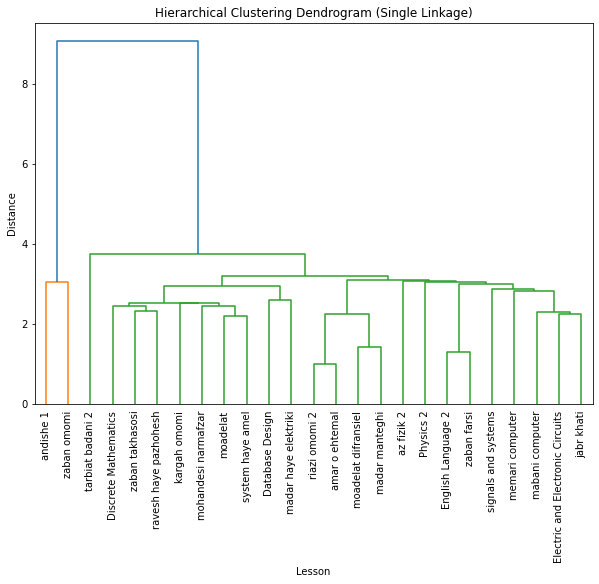

In [3]:
# تبدیل داده‌ها به DataFrame
df = pd.DataFrame(data)

# انتخاب ستون‌های عددی برای محاسبه فاصله
numeric_columns = ['ECTS', 'Total_ECTS_in_Semester', 'Days_for_Final_Test', 'Nth_Test_of_Semester', 'num_Grade_values']

# محاسبه ماتریس فاصله
distance_matrix = pdist(df[numeric_columns], metric='euclidean')

# اجرای الگوریتم خوشه‌بندی سلسله‌مراتبی با روش لینک تک‌پیوند (min)
Z = linkage(distance_matrix, method='single')

# نمایش دندوگرام
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df['Lesson'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Lesson')
plt.ylabel('Distance')
plt.show()